In [49]:
import collections
import re

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

sns.set()

# Build Citation Network

In [2]:
with open('acmv1.txt') as f:
    lines = f.readlines()

In [3]:
def norm_venue_name(venue):
    normed_venue = ''
    for s in venue.split(' '):
        if re.search('[0-9]',s) is None:
            normed_venue += s.lower()
    return normed_venue

In [106]:
G = nx.DiGraph()
titles = []
years = []
venues = []
for line in tqdm(lines):
    if line == '\n':
        venue, num = None, None
        continue
    initial = line[1]
    if initial == 'c':
        venue = line[2:-1]
    elif initial == 'i':
        num = int(line[6:-1])
        G.add_node(num)
        venues.append(venue)
        G.nodes[num]['venue'] = venue
    elif initial=='*':
        titles.append(line[2:-1])
    elif initial=='t':
        years.append(int(line[2:-1]))
    elif initial == '%':
        if venue is not None and num is not None:
            G.add_edges_from([(num, int(line[2:-1]))])

# Fundamental Information

In [107]:
print('#Nodes:', G.number_of_nodes())
print('#Edges:', G.number_of_edges())

#Nodes: 629814
#Edges: 632751


In [88]:
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
deg = np.array(list(deg)) + 1

In [89]:
np.mean(degree_sequence)

1.0046632815402643

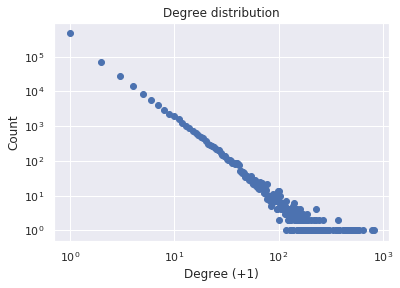

In [90]:
plt.scatter(deg, cnt)
plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Degree (+1)")
plt.xscale('log')
plt.yscale('log')
plt.show()

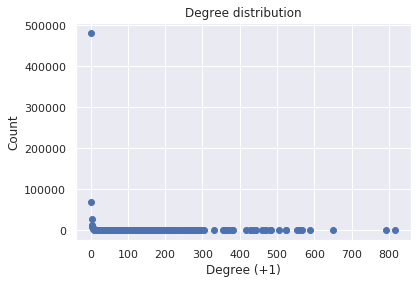

In [92]:
plt.scatter(deg, cnt)
plt.title("Degree distribution")
plt.ylabel("Count")
plt.xlabel("Degree (+1)")
plt.show()

# PageRank

In [9]:
pr = nx.pagerank(G)

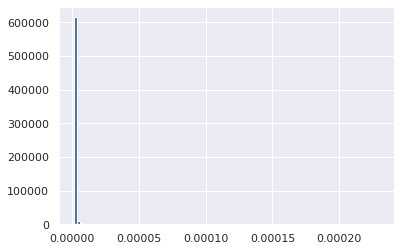

In [22]:
prs = list(pr.values())
plt.hist(prs, bins=100);

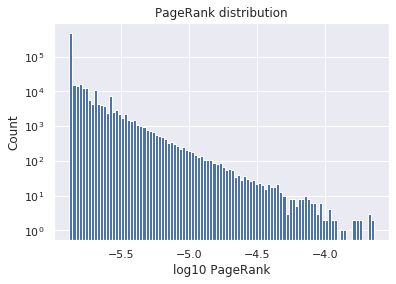

In [125]:
plt.hist(np.log10(prs), bins=100)
plt.title("PageRank distribution")
plt.ylabel("Count")
plt.xlabel("log10 PageRank")
plt.yscale('log')
plt.show()

# PageRank vs. Citations

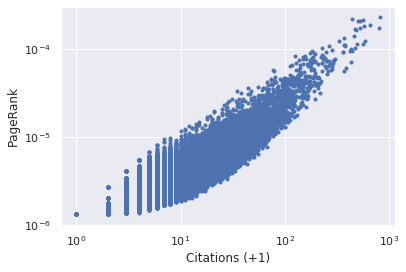

In [97]:
degs = np.array([d for n, d in G.in_degree()])
plt.scatter(1+degs, prs, marker='.')
plt.xlabel('Citations (+1)')
plt.ylabel('PageRank')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-6,3e-4])
plt.show()

In [103]:
np.corrcoef(np.log(1+degs), np.log(prs))

array([[1.        , 0.90263834],
       [0.90263834, 1.        ]])

In [108]:
df = pd.DataFrame()
df['title'] = titles
df['year'] = years
df['venue'] = venues
df['citation'] = degs
df['pagerank'] = prs
print(df.shape)
df.head()

(629814, 5)


,title,year,venue,citation,pagerank
0,Automated Deduction in Geometry: 5th Internati...,2006,,0,0.000001
1,A+ Certification Core Hardware (Text & Lab Man...,2003,,0,0.000001
2,Performance engineering in industry: current p...,2007,Proceedings of the 6th international workshop ...,0,0.000001
3,"Dude, You Can Do It! How to Build a Sweeet PC",2005,,0,0.000001
4,What Every Programmer Needs to Know about Secu...,2006,,0,0.000001


In [130]:
df[df['pagerank']<=3e-6].sort_values('citation', ascending=False)[:10]

,title,year,venue,citation,pagerank
1251,Online Learning and Teaching in Higher Educati...,2006,,20,0.000003
140968,Distance Sensor Data Integration and Prediction,2007,Proceeding of the 2007 conference on Artificia...,20,0.000003
84903,On saying &ldquo;Enough already!&rdquo; in SQL,1997,ACM SIGMOD Record,20,0.000003
294728,Some basic properties of the MLE's for a multi...,1998,American Journal of Mathematical and Managemen...,19,0.000003
139234,Efficient decision making algorithms for adapt...,2009,Proceedings of the 3rd international workshop ...,19,0.000003
226235,Historical trends in computer and information ...,1994,The computer as medium,18,0.000003
57485,Guest Editors&#x2019; Foreword,2009,Discrete Computational Geometry,18,0.000003
77606,"Gamma, chromatic typing and vegetation",1996,"Coordination programming: mechanisms, models a...",18,0.000003
48112,A Verification-Based Localization Method for U...,2008,Proceedings of the 2008 International Conferen...,17,0.000003
266409,Report of Working Group on Reengineering Opera...,1998,Workshop ion on Object-Oriented Technology,17,0.000003


In [133]:
df[df['pagerank']<=3e-6].sort_values('citation', ascending=False)[:10]['title'].values

array(['Online Learning and Teaching in Higher Education, 1 edition',
       'Distance Sensor Data Integration and Prediction',
       'On saying &ldquo;Enough already!&rdquo; in SQL',
       "Some basic properties of the MLE's for a multivariate normal distribution with monotone missing data",
       'Efficient decision making algorithms for adaptive applications',
       'Historical trends in computer and information technology',
       'Guest Editors&#x2019; Foreword',
       'Gamma, chromatic typing and vegetation',
       'A Verification-Based Localization Method for Unstable Radio Sensor Networks in Smart Home Environments',
       'Report of Working Group on Reengineering Operations'],
      dtype=object)

In [131]:
df[df['pagerank']>3e-5].sort_values('citation')[:10]

,title,year,venue,citation,pagerank
39704,Applications of the gröbner fan to gene networ...,2008,ACM Communications in Computer Algebra,34,0.000033
56008,Research on the Influence of Tunnel Wall on Ra...,2009,Proceedings of the 2009 WRI International Conf...,37,0.000031
110687,The New Zealand Digital Library Project,1996,,43,0.000036
22079,Automatic Real-Time Moving Target Detection fr...,2006,Proceedings of the 2006 International Conferen...,43,0.000030
3048,Microsoft Windows 2000 70-220,2003,,45,0.000030
45944,Estimating tree crown size with spatial inform...,2007,International Journal of Remote Sensing,46,0.000033
3781,IBM System I Security Guide for IBM I5/Os Vers...,2006,,54,0.000037
31150,Modeling the Content of Adaptive Web-Based Sys...,2006,Proceedings of the First International Worksho...,59,0.000034
24696,Conditional Fault-Tolerant Cycle-Embedding of ...,2006,Proceedings of the Seventh International Confe...,61,0.000036
37804,New second-and fourth-order accurate numerical...,2007,International Journal of Computer Mathematics,63,0.000035


In [134]:
df[df['pagerank']>3e-5].sort_values('citation')[:10]['title'].values

array(['Applications of the gröbner fan to gene network reconstruction (abstract only)',
       'Research on the Influence of Tunnel Wall on Radiation Field Caused by the Leaky Antenna',
       'The New Zealand Digital Library Project',
       'Automatic Real-Time Moving Target Detection from Infrared Video',
       'Microsoft Windows 2000 70-220',
       'Estimating tree crown size with spatial information of high resolution optical remotely sensed imagery',
       'IBM System I Security Guide for IBM I5/Os Version 5 Release 4',
       'Modeling the Content of Adaptive Web-Based System Using an Ontology',
       'Conditional Fault-Tolerant Cycle-Embedding of Crossed Cube',
       'New second-and fourth-order accurate numerical schemes for the nonlinear cubic Schrödinger equation'],
      dtype=object)